In [1]:
import rootpy.ROOT as ROOT
from rootpy.io import root_open, DoesNotExist
from rootpy.plotting import Canvas, Hist, Hist2D, Hist3D

In [3]:
f = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/Pi_Plus_mc_all.root" )

In [4]:
def copyHist( hIn ) :
    nBins = hIn.GetNbinsX()
    hOut = Hist( nBins, hIn.GetXaxis().GetXmin(), hIn.GetXaxis().GetXmax() )
    hOut.FillRandom( "gaus" )
    for i in range( 1, nBins ) :
        hOut.SetBinContent( i, hIn.GetBinContent( i ) )
        hOut.SetBinError( i, .01 )
    return hOut

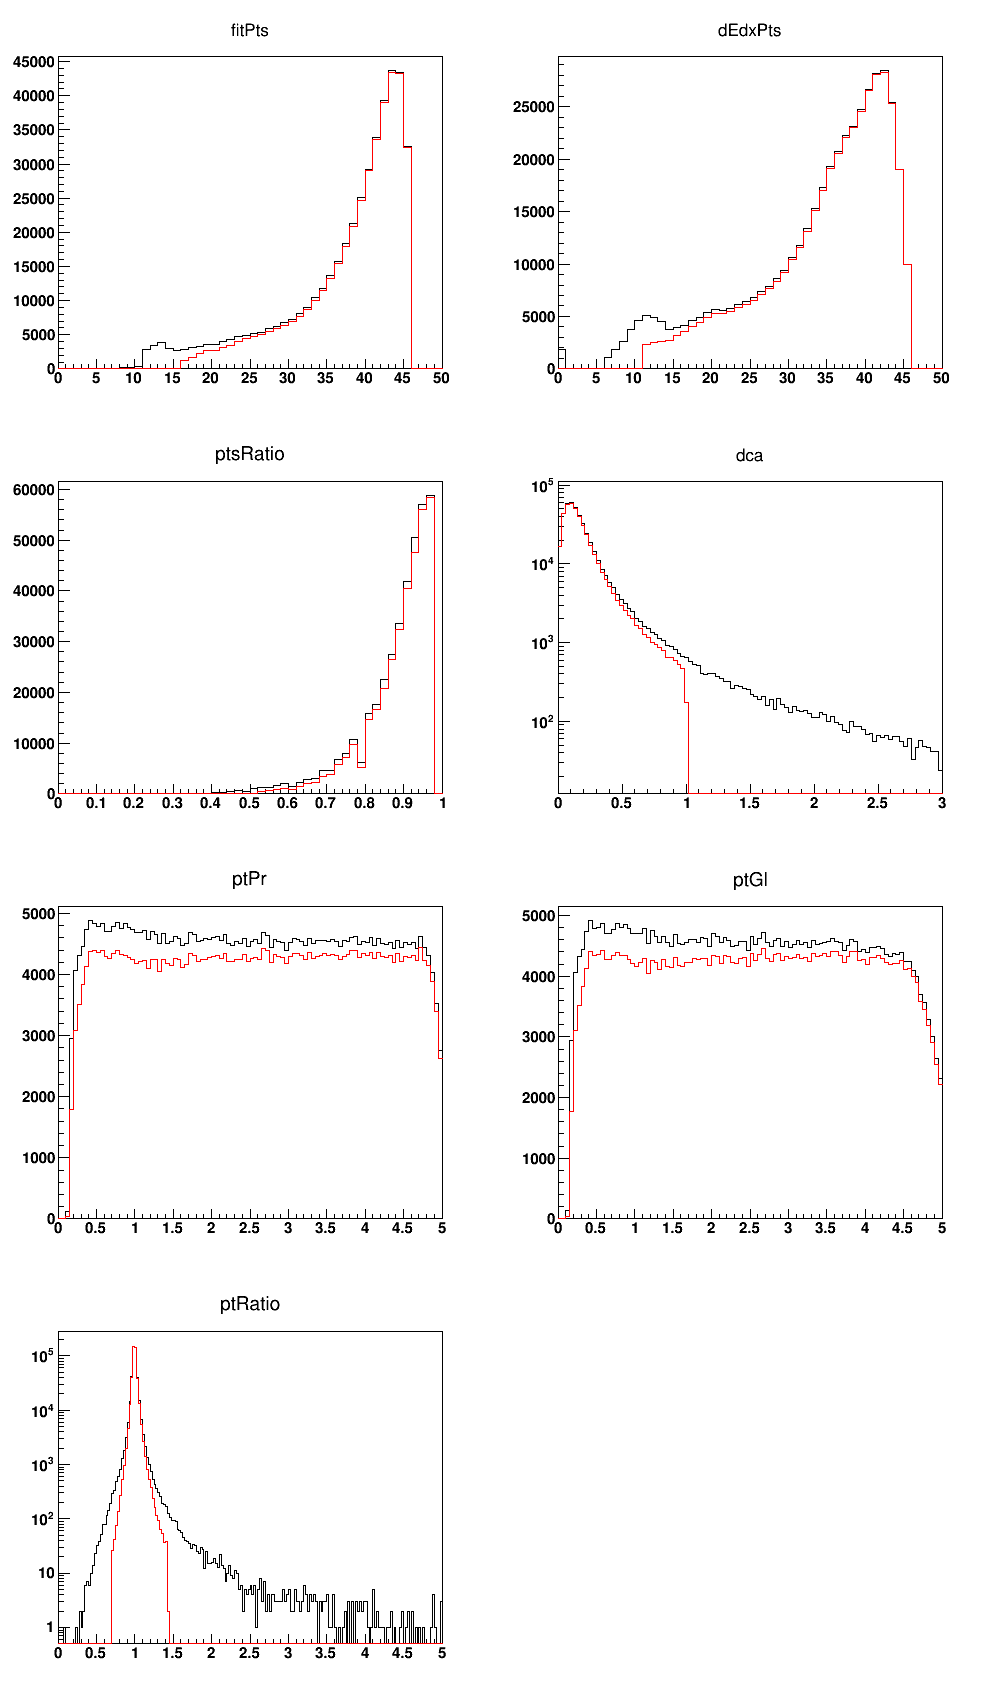

In [5]:
def drawPrePost( name, iPad, **kwarg ) :
    c.cd( iPad )
    hPre = f.Get( name )
    hPost = f.Get( "post_"+name )
    hPre.Draw()
    hPost.SetLineColor( 'red' )
    hPost.Draw("same")
    if "logY" in kwarg :
        ROOT.gPad.SetLogy( kwarg[ 'logY'] )

c = Canvas( width=1000, height=1700 )
c.Clear()
ROOT.gStyle.SetOptStat(0)
c.Divide( 2, 4 )

drawPrePost( "fitPts", 1 )
drawPrePost( "dEdxPts", 2 )
drawPrePost( "ptsRatio", 3 )
drawPrePost( "dca", 4, logY=1 )
drawPrePost( "ptPr", 5 )
drawPrePost( "ptGl", 6 )
drawPrePost( "ptRatio", 7, logY=1 )

c

In [4]:
# multiplicity is x
# rapidity is y
# pt is z
def PlotEff( cl, ch, yl, yh, name ) :
    hPre = f.pre
    hPre.GetXaxis().SetRangeUser( cl, ch )
    hPre.GetYaxis().SetRangeUser( yl, yh )
    
    hPost = f.post
    hPost.GetXaxis().SetRangeUser( cl, ch )
    hPost.GetYaxis().SetRangeUser( yl, yh )
    
    hPass = hPost.Project3D('z').Clone( "hPass" )
    hTotal = hPre.Project3D('z').Clone( "hTotal" )
    
    effGraph = ROOT.TGraphAsymmErrors()
    effGraph.Divide( hPass, hTotal )
    
    #efunc = ROOT.TF1( name, "[0] * exp( - pow( [1] / x, [2] ) )", 0, 5 )
    #efunc.SetParameters( .25, .2, 1.5 )
    #hef.Fit( efunc, "R" )
    
    return effGraph


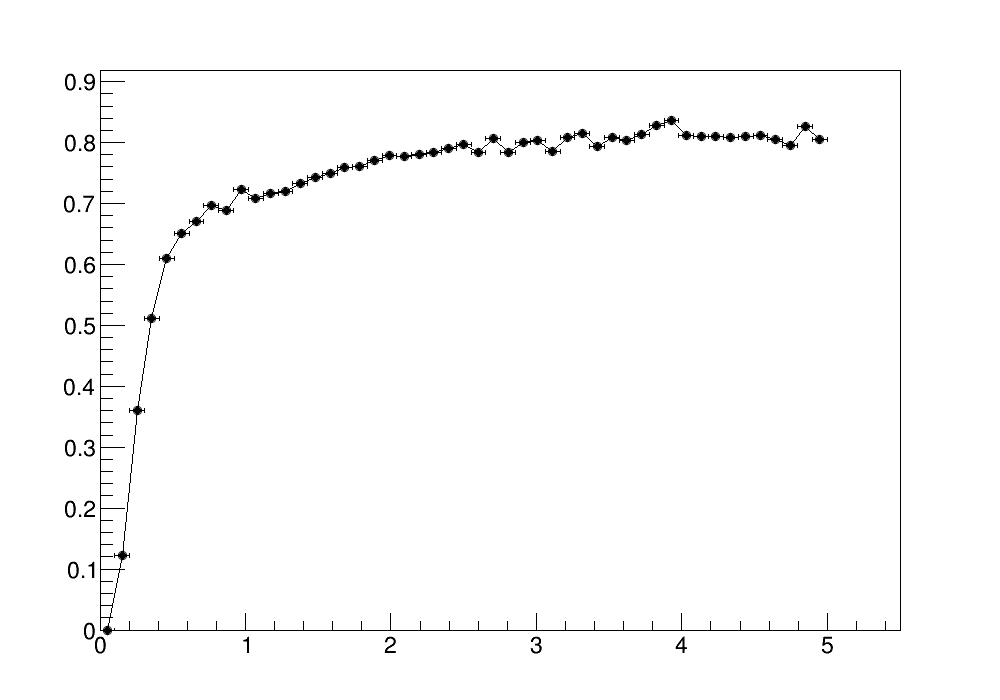

In [5]:
c2 = Canvas(  width=1000, height=700 )
hC = PlotEff( 239, 400, -1, 1, "ec")
hC.Draw()
c2

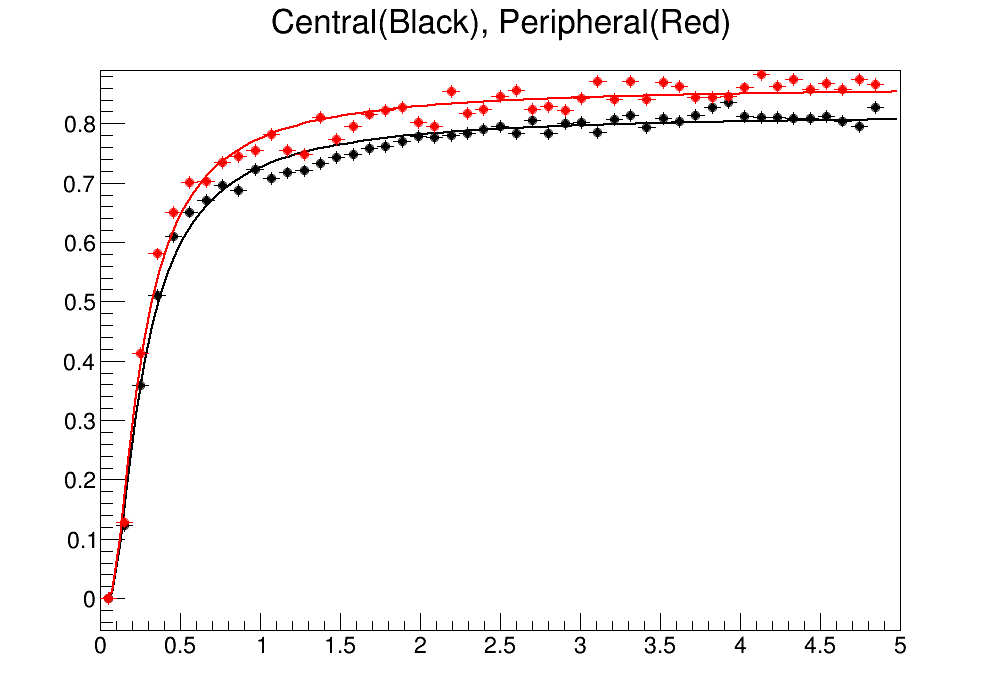

In [14]:
c2.Clear()
hefc, efc = PlotEff( 239, 400, -1, 1, "ec")
hefp, efp = PlotEff( 5, 22, -1, 1, "ep2")
hefc.SetTitle( "Central(Black), Peripheral(Red)" )
hefc.Draw()
efc.SetLineWidth(2)
efc.Draw("same")

hefp.SetMarkerColor(2 )
hefp.SetLineColor(2 )
hefp.Draw("same")
efp.SetLineColor(2 )
efp.SetLineWidth(2)
efp.Draw("same")
c2

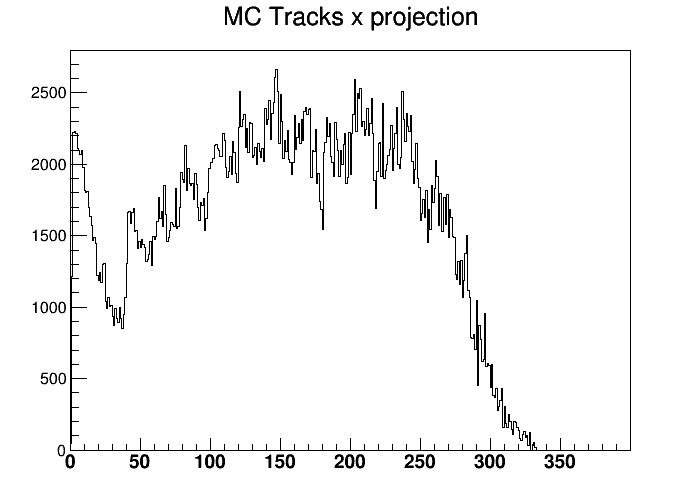

In [7]:
f.pre.Project3D( 'x' )

In [3]:
efunc = ROOT.TF1( "efunc", "[0] * exp( - pow( [1] / x, [2] ) )", 0, 5 )

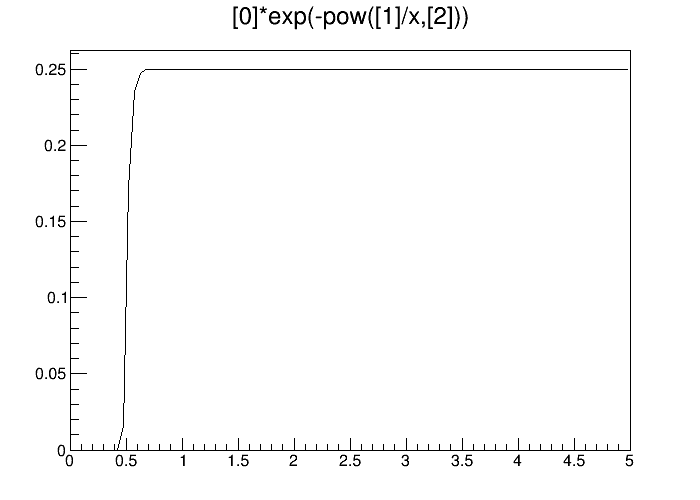

In [13]:
efunc.SetParameters( .25, 0.5, 20 )
efunc